# Imports

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import tensorflow as tf
from tensorflow.keras import  regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu, sigmoid

# Load Data

In [102]:
train_file =  h5py.File("dataset/train_catvnoncat.h5")

train_keys = list(train_file.keys())
train_values = list(train_file.values())

list_classes = np.array(train_file[train_keys[0]])
train_set_x = np.array(train_file[train_keys[1]])
train_set_y = np.array(train_file[train_keys[2]])

print("Keys: ")
for index, key in enumerate(train_keys):
    print(f"\t{index+1}-{key}")

print("\nValues: ")
for index, value in enumerate(train_values):
    print(f"\t{index+1}-{value}")

print("\nList Classes: ")
for index, item in enumerate(list_classes):
    print(f"\t{index+1}-{item}")


test_file =  h5py.File("dataset/test_catvnoncat.h5")

test_keys = list(test_file.keys())
test_values = list(test_file.values())

list_classes_test = np.array(test_file[test_keys[0]])
test_set_x = np.array(test_file[test_keys[1]])
test_set_y = np.array(test_file[test_keys[2]])

Keys: 
	1-list_classes
	2-train_set_x
	3-train_set_y

Values: 
	1-<HDF5 dataset "list_classes": shape (2,), type "|S7">
	2-<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
	3-<HDF5 dataset "train_set_y": shape (209,), type "<i8">

List Classes: 
	1-b'non-cat'
	2-b'cat'


# Plot Data

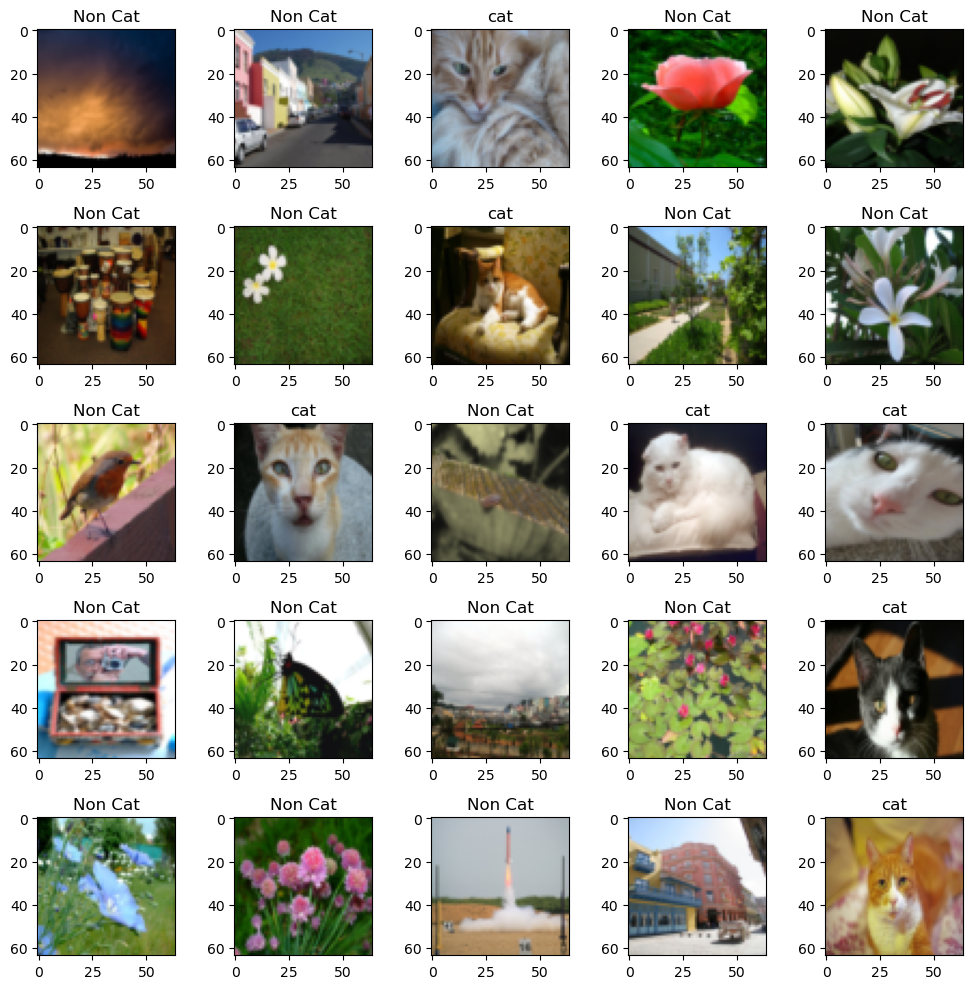

In [103]:
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.flatten()

for index, ax in enumerate(axs):
    ax.set_title("cat" if train_set_y[index] == 1 else "Non Cat")
    ax.imshow(train_set_x[index])  

plt.tight_layout()

# Flatten & Normalize Data

In [104]:
TRAIN_X = train_set_x.reshape(train_set_x.shape[0], -1) / 255  # maximum of color range
TRAIN_Y = train_set_y

TEST_X = test_set_x.reshape(test_set_x.shape[0], -1) / 255  #  maximum of color range
TEST_Y = test_set_y

print(f"TRAIN_X's Shape -> {TRAIN_X.shape}")
print(f"TRAIN_Y's Shape -> {TRAIN_Y.shape}", end="\n\n")
print(f"TEST_X's Shape -> {TEST_X.shape}")
print(f"TEST_Y's Shape -> {TEST_Y.shape}")

TRAIN_X's Shape -> (209, 12288)
TRAIN_Y's Shape -> (209,)

TEST_X's Shape -> (50, 12288)
TEST_Y's Shape -> (50,)


# Build Neural Network

In [131]:
model = Sequential([
    tf.keras.Input((12288, )),
    Dense(units=256, activation="relu", kernel_regularizer=regularizers.l2(0.001)),   
    Dense(units=128, activation="relu", kernel_regularizer=regularizers.l2(0.001)),   
    Dense(units=64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    Dense(units=1, activation="sigmoid"),
])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(
    loss=BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
    )


# Summary of the model

In [132]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 256)            │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,187,201 (12.16 MB)

 Trainable params: 3,187,201 (12.16 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [133]:
history = model.fit(TRAIN_X, TRAIN_Y, epochs=100, validation_data=(TEST_X, TEST_Y), callbacks=[early_stopping])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5429 - loss: 2.3435 - val_accuracy: 0.3400 - val_loss: 2.3304
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6301 - loss: 1.4203 - val_accuracy: 0.6200 - val_loss: 1.3370
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6869 - loss: 1.3632 - val_accuracy: 0.3400 - val_loss: 2.2107
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5766 - loss: 1.4319 - val_accuracy: 0.7400 - val_loss: 1.1708
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4979 - loss: 1.5121 - val_accuracy: 0.3400 - val_loss: 1.9081
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6776 - loss: 1.2360 - val_accuracy: 0.4000 - val_loss: 1.4606
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6931 - loss: 1.1306 - val_accuracy: 0.3400 - val_loss: 1.7387
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6928 - loss: 1.1726 - val_accuracy: 0.3400 - val_loss:

# Predictions

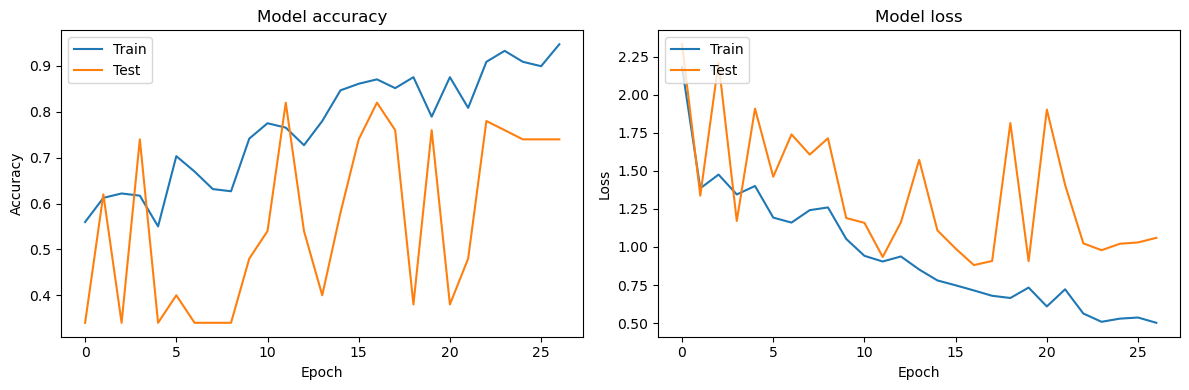

In [134]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()